In [1]:
from os import sys
sys.path.append("SegFormer3D-main")

import torch
import numpy as np

from metrics.competition_metric import ULS23_evaluator
from tqdm import tqdm



In [2]:
evaluator = ULS23_evaluator()

In [3]:
# Load data
base_path = '/vol/csedu-nobackup/course/IMC037_aimi/group08/aimi-project/data/model_predictions_best_diceCE_checkpoint/'

# Data count
VAL_COUNT = 866
validation_data = []


for i in tqdm(range(VAL_COUNT)):
    data = torch.load(base_path + f'input_tensor_idx{i}.pt', weights_only=False).to('cpu')
    logits = torch.load(base_path + f'pred_tensor_idx{i}.pt', weights_only=False).to('cpu')
    label = torch.load(base_path + f'label_tensor_idx{i}.pt', weights_only=False).to('cpu')

    validation_data.append((data, logits, label))


100%|██████████| 866/866 [03:10<00:00,  4.55it/s]


In [4]:
scores_per_threshold = []

for threshold in np.linspace(0.1, 0.9, 9):
    print(f"Current threshold: {threshold}")
    uls_metric_clean = 0.0

    for data, logits, label in tqdm(validation_data, leave=False):
        pred = torch.sigmoid(logits[:, 1:, ...])
        pred = pred > threshold
        
        uls_metric_clean += evaluator.ULS_score_metric(pred, label[:, 1:, ...])

    uls_metric_clean /= VAL_COUNT
    scores_per_threshold.append(uls_metric_clean)


Current threshold: 0.1


Current threshold: 0.2


Current threshold: 0.30000000000000004


Current threshold: 0.4


Current threshold: 0.5


Current threshold: 0.6


Current threshold: 0.7000000000000001


Current threshold: 0.8


Current threshold: 0.9


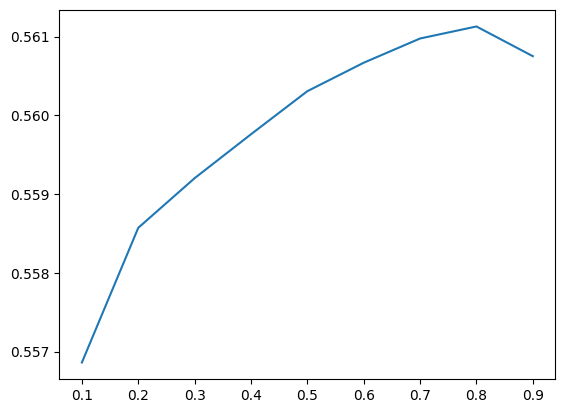

In [6]:
from matplotlib import pyplot as plt


plt.plot(np.linspace(0.1, 0.9, 9), scores_per_threshold)
plt.show()